In [2]:
import json
from pprint import pprint

In [3]:
with open("successful_csvs_poly_palr.json") as f:
    data = json.load(f)

In [5]:
for key in data:
    for item in data[key]:
        print(key, item, len(data[key][item]))


openrouter/meta-llama/llama-3.1-8b-instruct polynomial.py.TestPolynomial 3
openrouter/meta-llama/llama-3.1-8b-instruct palindrome.py.TestPalindrome 0
openrouter/meta-llama/llama-3.1-8b-instruct palindrome_random.py.TestPalindromeRandom 5


In [6]:
import pandas as pd
from io import StringIO
import numpy as np

In [11]:
import string
import numpy as np
import pandas as pd

# a list of 50 palindromes and 50 non-palindromes each randomly generated
np.random.seed(42)
non_palindromes = [
    "".join(
        np.random.choice(list(string.ascii_lowercase), size=np.random.randint(3, 12))
    )
    for _ in range(50)
]


def gen_palindrome(length):
    txt = "".join(
        np.random.choice(
            list(string.ascii_lowercase), size=np.random.randint(1, length // 2)
        )
    )
    if np.random.rand() < 0.5:
        return txt + txt[::-1]
    else:
        return txt + txt[::-1][1:]


palindromes = [gen_palindrome(np.random.randint(4, 12)) for _ in range(50)]
all_words = np.concatenate([palindromes, non_palindromes])


def is_palindrome(word):
    w = "".join(filter(str.isalpha, word)).lower()
    return w == w[::-1]


questions = [
    f"Answer 0 if the word '{word}' is not a palindrome ignoring non-alphabetic characters, and 1 if it is a palindrome."
    for word in all_words
]
answers = ["0" if not is_palindrome(word) else "1" for word in all_words]
df = pd.DataFrame({"question": questions, "answer": answers})
df.to_csv("gt_dummy_data.csv", index=False)
df.head()

,question,answer
0,Answer 0 if the word 'k' is not a palindrome i...,1
1,Answer 0 if the word 'j' is not a palindrome i...,1
2,Answer 0 if the word 'yxy' is not a palindrome...,1
3,Answer 0 if the word 'g' is not a palindrome i...,1
4,Answer 0 if the word 'h' is not a palindrome i...,1


In [12]:
def replace_dummy_data(csv_txt: str, path="../lm_eval/tasks/dummy_task/dummy_data.csv"):
    with open(path, "w") as f:
        f.write(csv_txt)


replace_dummy_data(
    data["openrouter/meta-llama/llama-3.1-8b-instruct"][
        "palindrome_random.py.TestPalindromeRandom"
    ][-1]
)

In [ ]:
df_preview = pd.read_csv(
    StringIO(
        data["openrouter/meta-llama/llama-3.1-8b-instruct"][
            "palindrome_random.py.TestPalindromeRandom"
        ][-1]
    )
)
# rename string columns to question and answer
df_preview.rename(
    columns={"string": "question", "is_palindrome": "answer"}, inplace=True
)

# format each question to be a string
template = "Answer 0 if the word '{word}' is not a palindrome ignoring non-alphabetic characters, and 1 if it is a palindrome."
df_preview["question"] = df_preview["question"].apply(lambda x: template.format(word=x))
df_preview.head()

replace_dummy_data(df_preview.to_csv(index=False))


In [18]:
%%bash
cd ..
for model in "meta-llama/llama-3.1-8b-instruct" "mistralai/mistral-small-3.1-24b-instruct" "meta-llama/llama-3.3-70b-instruct" "qwen/qwen3-235b-a22b" "deepseek/deepseek-chat-v3-0324"; do
    OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
        --model_args model=$model,num_concurrent=64 \
        --tasks strawberry \
        --apply_chat_template \
        --output_path experimental-notebooks/palindrome-random-results-data=llama-3.1-8b-instruct
done

2025-05-14:16:25:55 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:25:55 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:25:55 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.1-8b-instruct', 'num_concurrent': 64}
2025-05-14:16:25:55 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:25:55 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:25:55 INFO     [models.api_models:133] Using tokenizer None
Generating train split: 100 examples [00:00, 32000.49 examples/s]
2025-05-14:16:25:55 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:25:55 WARNING  [evaluator:461] Chat template formatting change affects loglikeliho

openrouter-chat (model=meta-llama/llama-3.1-8b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.64|±  |0.0482|
|          |       |strict-match    |     0|exact_match|↑  | 0.01|±  |0.0100|



2025-05-14:16:26:16 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:26:16 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:26:16 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'mistralai/mistral-small-3.1-24b-instruct', 'num_concurrent': 64}
2025-05-14:16:26:16 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:26:16 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:26:16 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:26:17 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:26:17 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readm

openrouter-chat (model=mistralai/mistral-small-3.1-24b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.92|±  |0.0273|
|          |       |strict-match    |     0|exact_match|↑  | 0.00|±  |0.0000|



2025-05-14:16:26:31 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:26:31 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:26:31 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.3-70b-instruct', 'num_concurrent': 64}
2025-05-14:16:26:31 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:26:31 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:26:31 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:26:32 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:26:32 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md fo

openrouter-chat (model=meta-llama/llama-3.3-70b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.93|±  |0.0256|
|          |       |strict-match    |     0|exact_match|↑  | 0.06|±  |0.0239|



2025-05-14:16:26:57 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:26:57 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:26:57 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'qwen/qwen3-235b-a22b', 'num_concurrent': 64}
2025-05-14:16:26:57 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:26:57 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:26:57 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:26:57 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:26:57 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for details.
20

openrouter-chat (model=qwen/qwen3-235b-a22b,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |    0|±  |     0|
|          |       |strict-match    |     0|exact_match|↑  |    0|±  |     0|



2025-05-14:16:27:24 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:27:24 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:27:24 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'deepseek/deepseek-chat-v3-0324', 'num_concurrent': 64}
2025-05-14:16:27:24 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:27:24 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:27:24 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:27:24 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:27:24 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for d

openrouter-chat (model=deepseek/deepseek-chat-v3-0324,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.29|±  |0.0456|
|          |       |strict-match    |     0|exact_match|↑  | 0.11|±  |0.0314|



In [19]:
# upload the gt data
replace_dummy_data(df.to_csv(index=False))

In [20]:
%%bash
cd ..
for model in "meta-llama/llama-3.1-8b-instruct" "mistralai/mistral-small-3.1-24b-instruct" "meta-llama/llama-3.3-70b-instruct" "qwen/qwen3-235b-a22b" "deepseek/deepseek-chat-v3-0324"; do
    OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
        --model_args model=$model,num_concurrent=64 \
        --tasks strawberry \
        --apply_chat_template \
        --output_path experimental-notebooks/palindrome-random-results-data=gt
done

2025-05-14:16:28:06 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:28:06 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:28:06 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.1-8b-instruct', 'num_concurrent': 64}
2025-05-14:16:28:06 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:28:06 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:28:06 INFO     [models.api_models:133] Using tokenizer None
Generating train split: 100 examples [00:00, 27225.13 examples/s]
2025-05-14:16:28:07 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:28:07 WARNING  [evaluator:461] Chat template formatting change affects loglikeliho

openrouter-chat (model=meta-llama/llama-3.1-8b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.89|±  |0.0314|
|          |       |strict-match    |     0|exact_match|↑  | 0.01|±  |0.0100|



2025-05-14:16:28:28 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:28:28 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:28:28 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'mistralai/mistral-small-3.1-24b-instruct', 'num_concurrent': 64}
2025-05-14:16:28:28 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:28:28 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:28:28 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:28:29 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:28:29 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readm

openrouter-chat (model=mistralai/mistral-small-3.1-24b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |    1|±  |     0|
|          |       |strict-match    |     0|exact_match|↑  |    0|±  |     0|



2025-05-14:16:28:40 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:28:40 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:28:40 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'meta-llama/llama-3.3-70b-instruct', 'num_concurrent': 64}
2025-05-14:16:28:40 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:28:40 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:28:40 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:28:40 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:28:40 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md fo

openrouter-chat (model=meta-llama/llama-3.3-70b-instruct,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.97|±  |0.0171|
|          |       |strict-match    |     0|exact_match|↑  | 0.12|±  |0.0327|



2025-05-14:16:28:59 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:28:59 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:28:59 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'qwen/qwen3-235b-a22b', 'num_concurrent': 64}
2025-05-14:16:28:59 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:28:59 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:28:59 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:29:00 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:29:00 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for details.
20

openrouter-chat (model=qwen/qwen3-235b-a22b,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |    0|±  |     0|
|          |       |strict-match    |     0|exact_match|↑  |    0|±  |     0|



2025-05-14:16:29:30 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:16:29:30 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:16:29:30 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'deepseek/deepseek-chat-v3-0324', 'num_concurrent': 64}
2025-05-14:16:29:30 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:16:29:30 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:16:29:30 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:16:29:30 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:16:29:30 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for d

openrouter-chat (model=deepseek/deepseek-chat-v3-0324,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  | 0.65|±  |0.0479|
|          |       |strict-match    |     0|exact_match|↑  | 0.06|±  |0.0239|



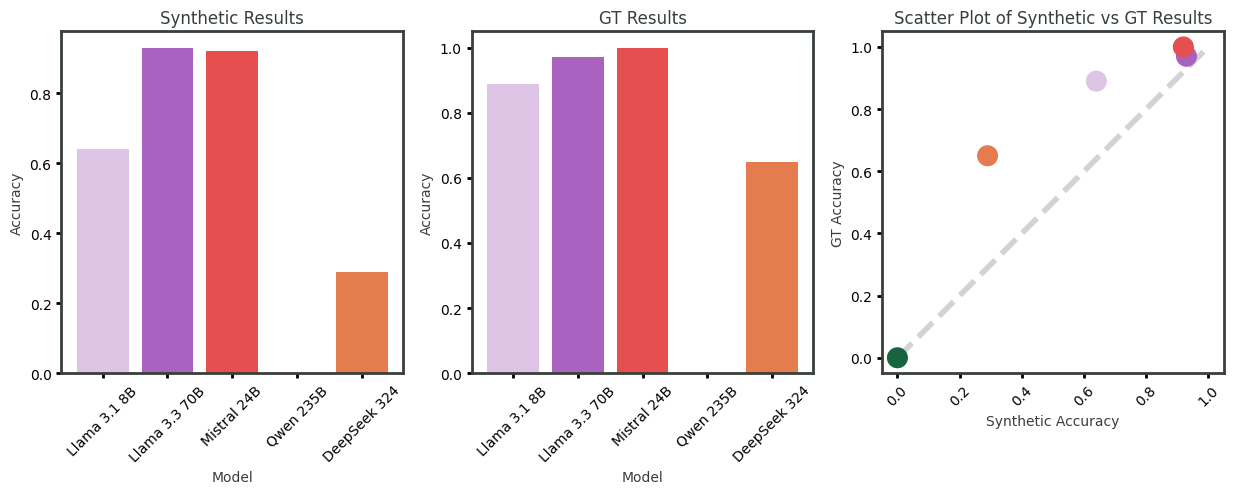

In [31]:
import matplotlib.pyplot as plt

synthetic_results = {
    "Llama 3.1 8B": 0.64,
    "Llama 3.3 70B": 0.93,
    "Mistral 24B": 0.92,
    "Qwen 235B": 0.0,
    "DeepSeek 324": 0.29,
}
gt_results = {
    "Llama 3.1 8B": 0.89,
    "Llama 3.3 70B": 0.97,
    "Mistral 24B": 1.0,
    "Qwen 235B": 0.0,
    "DeepSeek 324": 0.65,
}

background_color = "#FFFFFF"
text_and_border_color = "#384039"
model_colors = {
    "Llama 3.1 8B": "#DEC5E6",
    "Llama 3.3 70B": "#AA62C0",
    "Mistral 24B": "#E54F4F",
    "Qwen 235B": "#176440",
    "DeepSeek 324": "#E57C4F",
}

# make a plot of 2 bar charts then a scatter plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.set_facecolor(background_color)

for i in range(3):
    axs[i].set_facecolor(background_color)
    axs[i].tick_params(axis="x", rotation=45, width=2)
    axs[i].tick_params(axis="y", width=2)
    axs[i].spines["top"].set_linewidth(2)
    axs[i].spines["right"].set_linewidth(2)
    axs[i].spines["bottom"].set_linewidth(2)
    axs[i].spines["left"].set_linewidth(2)
    axs[i].spines["top"].set_color(text_and_border_color)
    axs[i].spines["right"].set_color(text_and_border_color)
    axs[i].spines["bottom"].set_color(text_and_border_color)
    axs[i].spines["left"].set_color(text_and_border_color)

# plot the synthetic results
axs[0].bar(
    synthetic_results.keys(),
    synthetic_results.values(),
    color=list(model_colors.values()),
)
axs[0].set_box_aspect(1)
axs[0].set_title("Synthetic Results", color=text_and_border_color)
axs[0].set_xlabel("Model", color=text_and_border_color)
axs[0].set_ylabel("Accuracy", color=text_and_border_color)


# plot the gt results
axs[1].bar(gt_results.keys(), gt_results.values(), color=list(model_colors.values()))
axs[1].set_box_aspect(1)
axs[1].set_title("GT Results", color=text_and_border_color)
axs[1].set_xlabel("Model", color=text_and_border_color)
axs[1].set_ylabel("Accuracy", color=text_and_border_color)

# plot the scatter plot
axs[2].scatter(
    synthetic_results.values(),
    gt_results.values(),
    color=list(model_colors.values()),
    s=200,
)
axs[2].set_box_aspect(1)
axs[2].set_title("Scatter Plot of Synthetic vs GT Results", color=text_and_border_color)
axs[2].set_xlabel("Synthetic Accuracy", color=text_and_border_color)
axs[2].set_ylabel("GT Accuracy", color=text_and_border_color)
# plot y=x line
axs[2].plot([0, 1], [0, 1], color="lightgray", linewidth=4, linestyle="--", zorder=0)

In [25]:
# calculate spearman's rank correlation coefficient
from scipy.stats import spearmanr

spearman_corr = spearmanr(list(synthetic_results.values()), list(gt_results.values()))
print(spearman_corr)


SignificanceResult(statistic=np.float64(0.8999999999999998), pvalue=np.float64(0.03738607346849875))
